# Линейная регрессия

Линейная связь между двумя точками

Линия выстраивается на методе наименьших квадратов (возведение остатков в квадрат - выбирается наименьшая сумма) с ошибками residual error

# Prediction models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image, display
import re

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Pet project - Laptop Price and Specification/laptop_clean_and_fill.csv')

In [4]:
df.head(3)

,Unnamed: 0,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty_years,Brand,Ram_numeric,Ram_value,Diagonal,SSD_value,CPU_cores,CPU_threads
0,0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,572.7,70.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels, Touch Screen",4 GB AMD Radeon RX 6500M,Windows 11 OS,1,HP,8,GB,15.6,512,6.0,12.0
1,1,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,272.6,56.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB LPDDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel UHD Graphics,Windows 11 OS,1,Tecno,8,GB,15.6,512,2.0,4.0
2,2,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,306.7,55.0,7th Gen AMD Ryzen 3 7320U,"Quad Core, 8 Threads",8 GB LPDDR5 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",AMD Radeon Graphics,Windows 11 OS,1,Lenovo,8,GB,15.6,512,4.0,8.0


In [5]:
df = df.drop('Unnamed: 0', axis =1)

In [6]:
df.shape

(894, 18)

----

## Разбиваем данные на обучающий и тестовый наборы данных - Train | Test Split

0. Очищаем и масштабируем данные X и y (при необходимости)
1. Разбиваем данные на обучающий и тестовый наборы данных - как для X, так и для y
2. Обучаем объект Scaler на обучающих данных X
3. Применяем масштабирование (scale) для тестовых данных X
4. Создаём модель
5. Обучаем модель на обучающих данных X
6. Оцениваем модель на тестовых данных X (создавая предсказания и сравнивая их с Y_test)
7. Уточняем параметры модели, повторяя шаги 5 и 6

Но еще нужно отмасштабирвать признаки, потому что они у наз разыне коэфициенты имеют

In [7]:
df.corr(numeric_only=True)['Price'].sort_values(ascending=False)

,Price
Price,1.000000
Ram_numeric,0.779448
CPU_cores,0.726266
CPU_threads,0.697083
SSD_value,0.669425
Rating,0.402115
Diagonal,0.254584
Warranty_years,0.230642


In [36]:
X = df[['Ram_numeric', 'CPU_cores', 'CPU_threads', 'SSD_value']]
X = df[['Ram_numeric', 'CPU_cores', 'CPU_threads']]

In [9]:
y = df['Price']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
#help(train_test_split)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) # random_state для воспроизведения результата

In [13]:
len(df)

894

In [14]:
len(X_train)

625

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()

In [38]:
model.fit(X_train, y_train)

LinearRegression()

In [30]:
test_predictions = model.predict(X_test)

И насколько хорошо наши результаты?
Эта сравнение реального значения и предсказанного и вычислчем ошибки

Метрики регрессии

In [31]:
X_test.head(

)

,Ram_numeric,CPU_cores,CPU_threads
544,8,10.0,12.0
888,16,8.0,16.0
194,8,8.0,8.0
218,16,8.0,16.0
281,8,10.0,12.0


In [20]:
y_test.head()

,Price
544,493.2
888,1568.1
194,1291.9
218,1193.1
281,596.6


In [39]:
test_predictions

array([ 7.10051355e+02,  9.69394751e+02,  5.76299318e+02,  9.69394751e+02,
        7.10051355e+02,  2.33139934e+03,  4.36269499e+02,  9.75672532e+02,
        7.01890676e+02,  1.24945439e+03,  4.29991718e+02,  2.33139934e+03,
        1.24945439e+03,  1.11570235e+03,  2.19764731e+03,  9.75672532e+02,
        1.38320643e+03,  2.19450842e+03,  8.41920495e+02,  1.11570235e+03,
        9.77555429e+02,  8.35642713e+02,  9.69394751e+02,  2.87582417e+03,
        1.11570235e+03,  9.75672532e+02,  1.11570235e+03,  1.10942457e+03,
        7.10051355e+02,  8.35642713e+02,  1.11570235e+03,  1.24945439e+03,
        2.96239681e+02,  7.01890676e+02,  1.38320643e+03,  2.96239681e+02,
        1.38320643e+03,  7.01890676e+02,  2.96239681e+02,  1.62487644e+02,
        9.69394751e+02,  1.24945439e+03,  1.51695846e+03,  1.38634532e+03,
        4.49842815e+03,  7.10051355e+02,  5.76299318e+02,  9.69394751e+02,
        1.62487644e+02,  2.96239681e+02,  9.69394751e+02,  1.62487644e+02,
        1.11570235e+03,  

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [40]:
df['Price'].mean()

np.float64(954.8539149888144)

<Axes: xlabel='Price', ylabel='Count'>

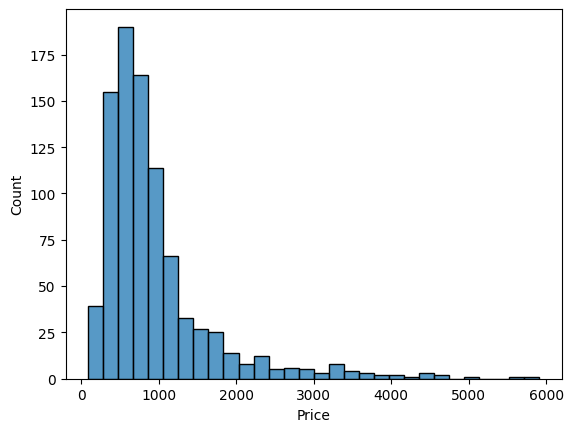

In [41]:
sns.histplot(data = df, x='Price', bins=30)

In [44]:
# средняя абсолютная ошибка
# насколько в среднем модель отклоняется от истинного значения
mean_absolute_error(y_test, test_predictions)

313.00119643689567

Ошибка получилась в районе 30 процентов

In [43]:
# средняя абсолютная ошибка
# уж очень большая - значит дл янескольких точек модель сильно ошибается
np.sqrt(mean_squared_error(y_test, test_predictions))

np.float64(487.58691133230576)

Анализ остатков

In [45]:
# графbr остатков
#sns.scatterplot(x=y_test, y=test_predictions)
test_residuals = y_test - test_predictions

In [46]:
test_residuals

,Price
544,-216.851355
888,598.705249
194,715.600682
218,223.705249
281,-113.451355
...,...
391,-180.390676
320,-462.806425
809,184.798964
341,53.673466


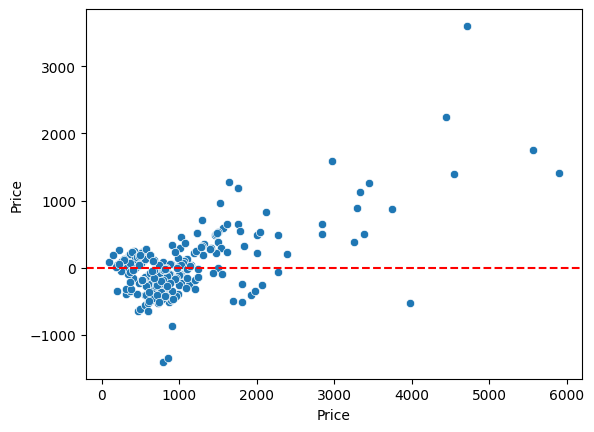

In [53]:
# график остатков - цель чтобы не было никакой линии, а были просто равномерно разбросанные точки
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', linestyle='--')

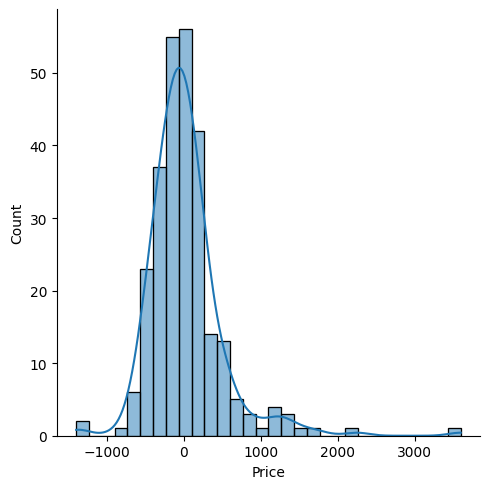

In [49]:
sns.displot(test_residuals, bins=30, kde=True)

In [51]:
import scipy as sp

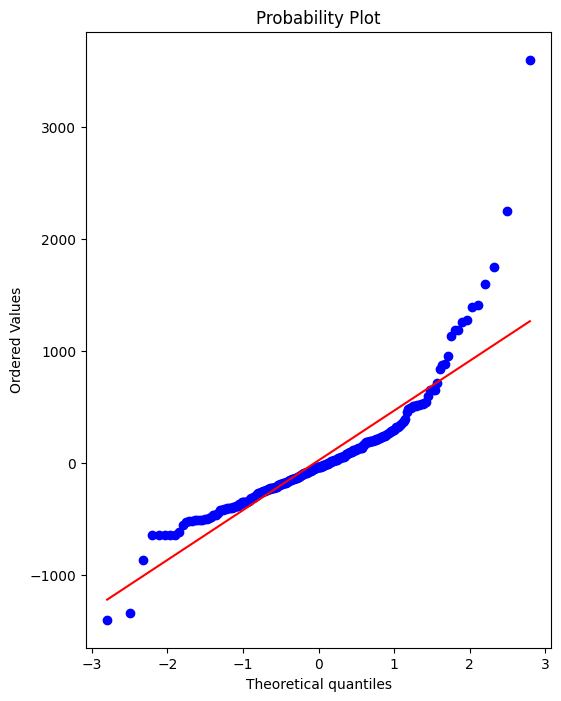

In [52]:
# Создаём объект figure и оси для рисования графика
fig, ax = plt.subplots(figsize=(6,8),dpi=100)

# probplot возвращает значения, которые можно использовать при необходимости
# мы хотим просто нарисовать график, поэтому присваиваем эти значения переменной _
_ = sp.stats.probplot(test_residuals,plot=ax)

### Внедрение модели

In [54]:
#создаем новый экземпляр модели для обучения всех данных
final_model = LinearRegression()

In [55]:
final_model.fit(X, y)

LinearRegression()

In [56]:
# бета коэф линейной регрессии
final_model.coef_

array([55.22747064, 72.56946667, -6.6656317 ])

Чем больше коэф-т тем больше влияние на результат (отрицательное даже говорит что наоборот снижает цену)

**Смысл коэффициентов:**

Если мы зафиксируем все остальные коэф-ты и будем менять только значение для рассматриваемого на 1 единицу (все остально енеизменного), то целевая переменная будет увеличиваться на данный коэф-т.

Для отрицательных: при увеличении признака -> будет уменьшение целевой переменной на коэф-т

In [58]:
X.head(3)

,Ram_numeric,CPU_cores,CPU_threads
0,8,6.0,12.0
1,8,2.0,4.0
2,8,4.0,8.0


In [59]:
y_hat = final_model.predict(X)

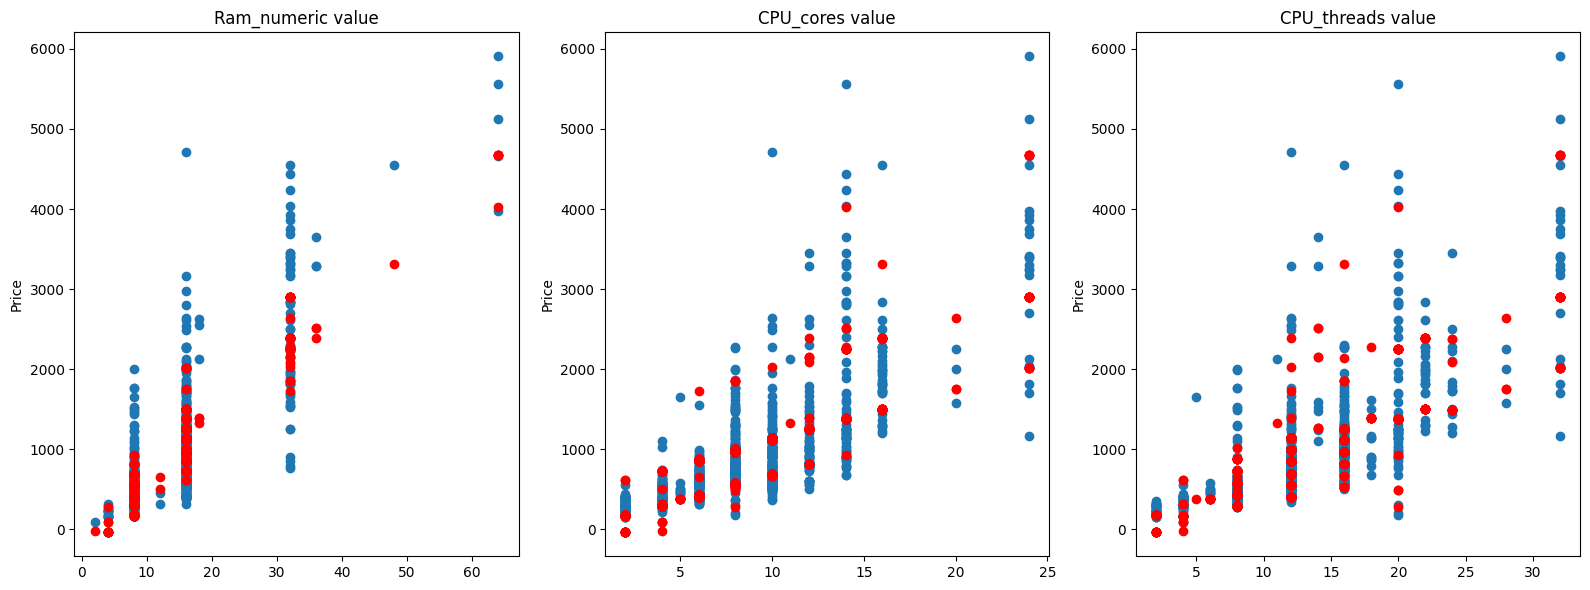

In [60]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['Ram_numeric'],df['Price'],'o')
axes[0].plot(df['Ram_numeric'],y_hat,'o',color='red')
axes[0].set_ylabel("Price")
axes[0].set_title("Ram_numeric value")

axes[1].plot(df['CPU_cores'],df['Price'],'o')
axes[1].plot(df['CPU_cores'],y_hat,'o',color='red')
axes[1].set_title("CPU_cores value")
axes[1].set_ylabel("Price")

axes[2].plot(df['CPU_threads'],df['Price'],'o')
axes[2].plot(df['CPU_threads'],y_hat,'o',color='red')
axes[2].set_title("CPU_threads value");
axes[2].set_ylabel("Price")
plt.tight_layout();

Нам нужна была нормализация перед этим похорошему

In [64]:
from joblib import dump,load

In [65]:
dump(final_model, 'final_laptop_prices_model.joblib')

['final_laptop_prices_model.joblib']

In [66]:
loaded_model = load('final_laptop_prices_model.joblib')

In [67]:
loaded_model.coef_

array([55.22747064, 72.56946667, -6.6656317 ])

In [68]:
# попробуем применить модель к новым данным
# нужно чтобы совпадала размерность всегда
X.shape

(894, 3)

In [69]:
#Придумаем харктеристики ноутбука HONOR MagicBook Art 14 2025
# Ram = 32gb, CPU_cores = 16, CPU_threads = 16
laptop = [[32,16,16]]

In [70]:
loaded_model.predict(laptop)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2429.54135808])

Получили примерно 2429 $ (данные для модели строились из 2024 года)

Цена на сайте - 2050 $ - неплохой результат!